Chapter 6 - Linear Model Selection Regularization - Question 11

In [51]:
library(MASS)
summary(Boston)
Boston=na.omit(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

## Best Subset Selection

In [52]:
library(leaps)
set.seed(1)
k=10
folds=sample(1:k,nrow(Boston),replace=TRUE)
cv.err = matrix(NA,nrow=k,ncol=13)
for(i in 1:k){
    bestsubset.model = regsubsets(crim~.,data=Boston[folds!=i,],nvmax=13)
    for(j in 1:13){
        form = as.formula(bestsubset.model$call[[2]])
        dataset = model.matrix(form,Boston[folds==i,])
        coef_vec = coef(bestsubset.model,id=j)
        pred = dataset[,names(coef_vec)]%*%coef_vec
        cv.err[i,j]=mean((pred-Boston$crim[folds==i])^2)
    }
}
mse = apply(cv.err,MARGIN=2,mean)

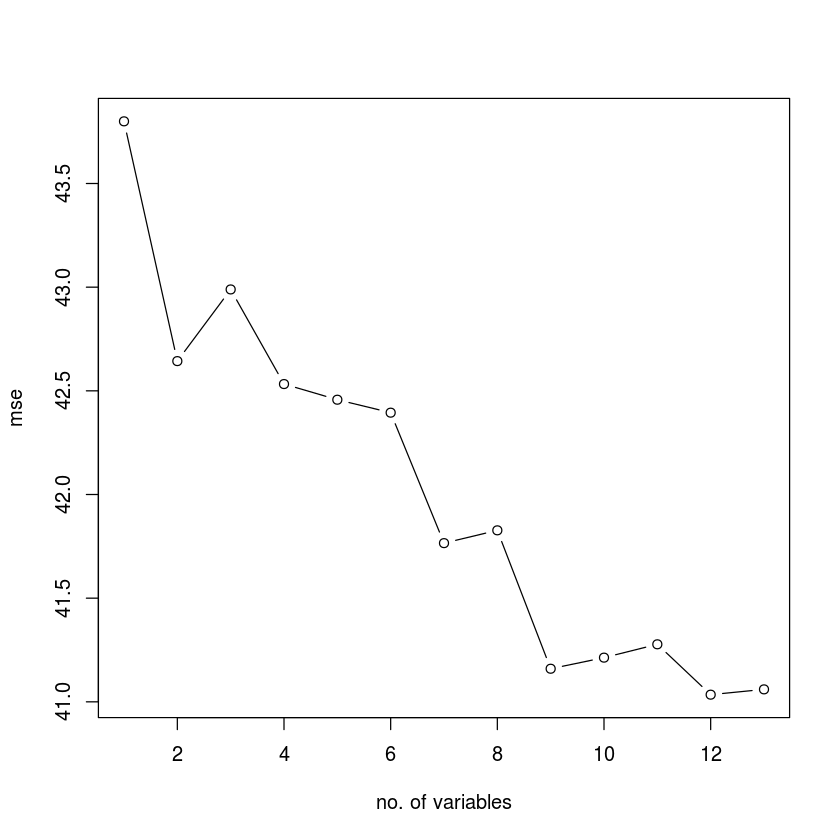

In [53]:
plot(mse,type="b",xlab="no. of variables")

In [54]:
which.min(mse)

[1] 12

In [55]:
bestsubset.mse = mse[which.min(mse)]
bestsubset.mse

[1] 41.03457

## Lasso Regression

[1] 0.082852

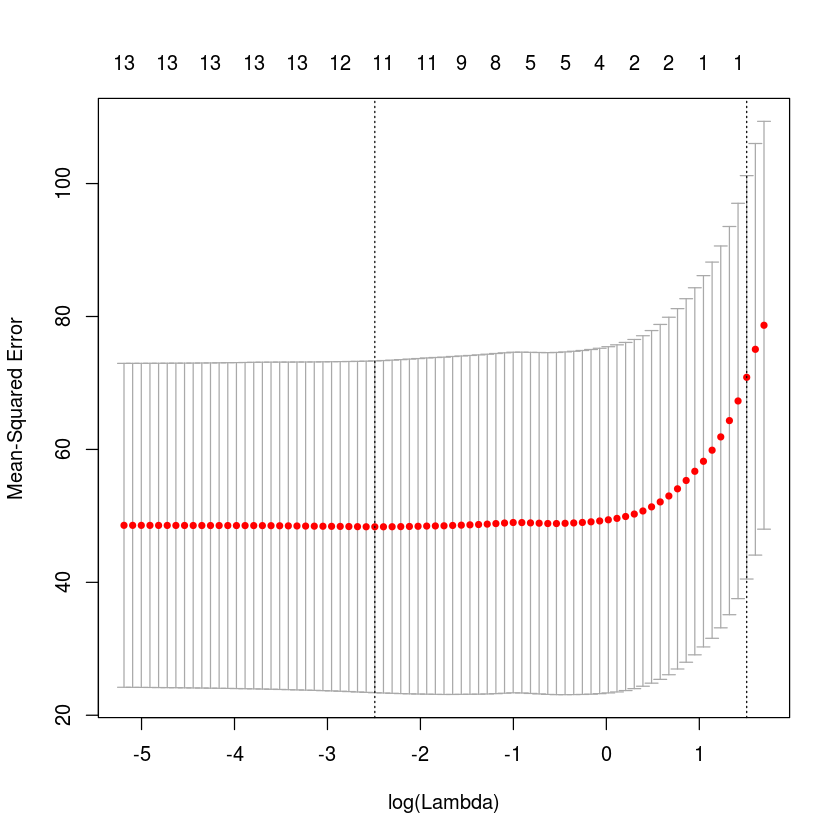

In [56]:
library(glmnet)
set.seed(1)
x = model.matrix(crim~.,data=Boston)[,-1]
y = Boston$crim
train = sample(nrow(x),nrow(x)%/%2)
cv.lasso = cv.glmnet(x[train,],y[train],alpha=1,type="mse")
plot(cv.lasso)
best.lambda = cv.lasso$lambda.min
best.lambda

In [57]:
lasso.model = glmnet(x,y,alpha=1)
coef = predict(lasso.model,type="coefficient",s=best.lambda)
coef

14 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept) 10.49327942
zn           0.03306034
indus       -0.05836746
chas        -0.53788430
nox         -4.86675762
rm           0.09886801
age          .         
dis         -0.66600513
rad          0.50162998
tax          .         
ptratio     -0.13551807
black       -0.00756184
lstat        0.12086746
medv        -0.13686346

In [69]:
#minimum squared error for lasso model
lasso.mse = min(cv.lasso$cvm)
lasso.mse

[1] 48.35729

## Ridge regression

[1] 0.8679707

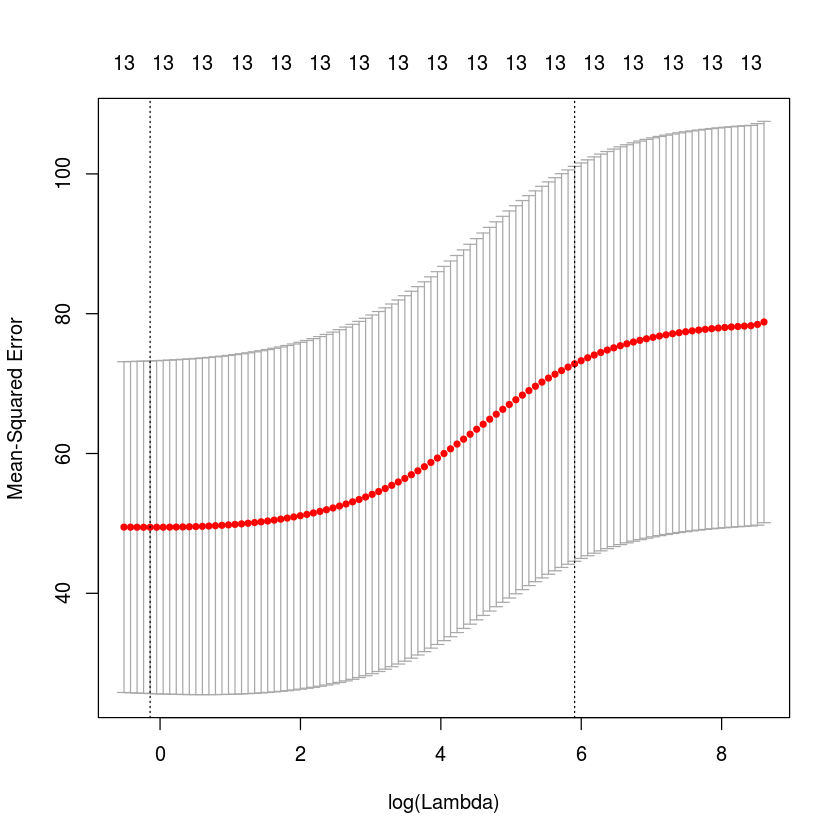

In [59]:
cv.ridge = cv.glmnet(x[train,],y[train],alpha=0)
best.lambda = cv.ridge$lambda.min
best.lambda
plot(cv.ridge)

In [60]:
ridge.mod = glmnet(x,y,alpha=0)
coef = predict(ridge.mod,type="coefficient",s=best.lambda)
coef

14 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)  6.707356785
zn           0.029513850
indus       -0.074808166
chas        -0.751919887
nox         -3.787703620
rm           0.290903010
age          0.002661270
dis         -0.602343159
rad          0.377650301
tax          0.004832656
ptratio     -0.090636960
black       -0.008733786
lstat        0.141828288
medv        -0.122211266

In [70]:
#minimum squared error of ridge regression
ridge.mse = min(cv.ridge$cvm)
ridge.mse

[1] 49.4491

## Principal Component Analysis

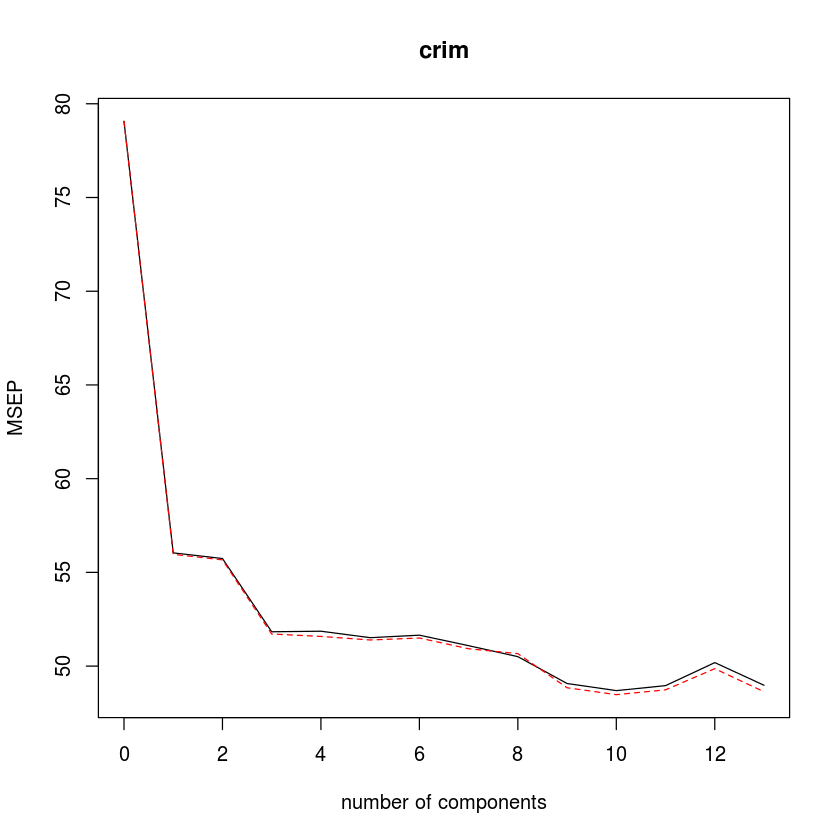

In [75]:
library(pls)
pcr.model = pcr(crim~.,data=Boston[train,],scale=TRUE,validation="CV")
validationplot(pcr.model,val.type="MSEP")

In [78]:
pcr.pred = predict(pcr.model,newdata=Boston[-train,],ncomp=10)
mean((pcr.pred-Boston[-train,]$crim)^2)

[1] 39.66534

In [79]:
summary(pcr.model)

Data: 	X dimension: 253 13 
	Y dimension: 253 1
Fit method: svdpc
Number of components considered: 13

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           8.892    7.486    7.466    7.199    7.202    7.178    7.187
adjCV        8.892    7.481    7.461    7.191    7.182    7.169    7.176
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       7.148    7.107    7.005     6.978     6.997     7.084     6.998
adjCV    7.136    7.118    6.989     6.963     6.981     7.061     6.974

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       49.04    60.72    69.75    76.49    83.02    88.40    91.73    93.77
crim    30.39    30.93    36.63    37.31    37.35    37.98    38.85    39.94
      9 comps  10 comps  11 comps  12 comps  13 comps
X       95.73     97.36     98.62     99.57    100.00
crim    41.89     42.73     

The model with 10 components have the lowest RMSEP

In [83]:
#minimum suared error of PCR
pcr.mse = 6.978^2
pcr.mse

[1] 48.69248

## (b)

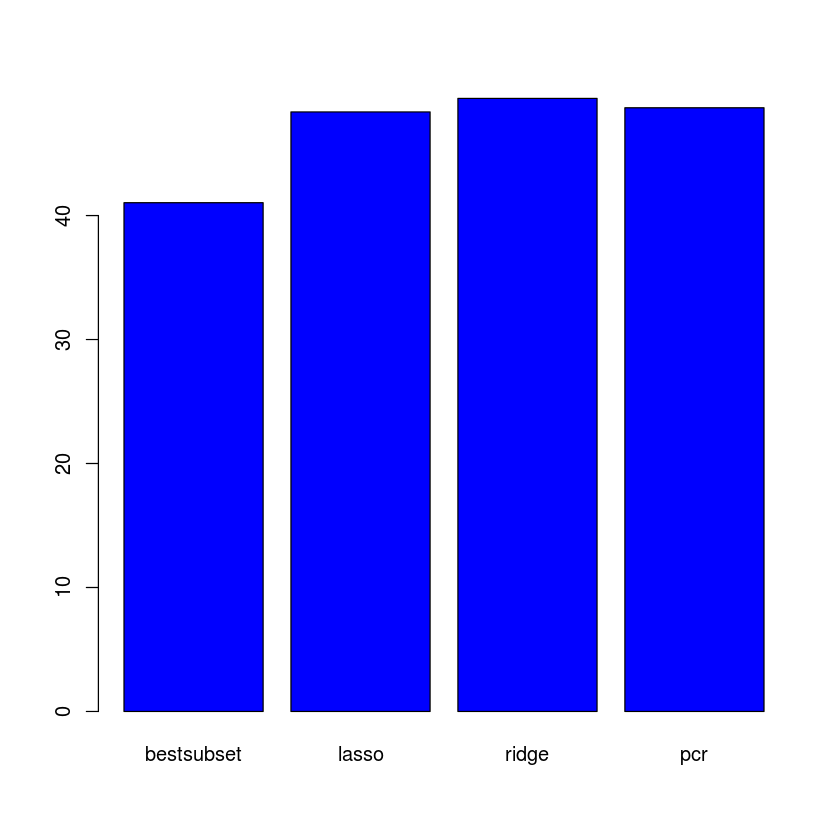

In [84]:
barplot(c(bestsubset.mse,lasso.mse,ridge.mse,pcr.mse),col="blue",names.arg=c("bestsubset","lasso","ridge","pcr"))

According to the bar plot the best subset selection has the lowest cross validation error.

The best subset model with 12 variables gives the lowest cross validation error. Therefore this model should be picked over the other models.